# Daily weather data in the Netherlands

- https://www.knmi.nl/nederland-nu/klimatologie/daggegevens
- https://aqicn.org/city/amsterdam/
- https://www.luchtmeetnet.nl/informatie/luchtkwaliteit/luchtkwaliteitsindex-(lki)

## Installing packages

In [319]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mode

## Importing data

### Weather

YYYYMMDD = Date (YYYY=year MM=month DD=day) / Date (YYYY=year MM=month DD=day

DDVEC = Vector mean wind direction in degrees (360=north, 90=east, 180=south, 270=west, 0=cale/variable). See http://www.knmi.nl/kennis-en-datacentrum/grond/klimatologische-brochures-en-boeken / Vector mean wind direction in degrees (360=north, 90=east, 180=south, 270=west, 0=calm/variable)

FHVEC = Vector mean wind speed (in 0.1 m/s). See http://www.knmi.nl/kennis-en-datacentrum/grond/klimatologische-brochures-en-boeken / Vector mean windspeed (in 0.1 m/s)

FG = 24-hour mean wind speed (in 0.1 m/s) / Daily mean wind speed (in 0.1 m/s)

FHX = Highest hourly mean wind speed (in 0.1 m/s) / Maximum hourly mean wind speed (in 0.1 m/s)

FHXH = Hour segment in which FHX was measured / Hourly division in which FHX was measured

FHN = Lowest hourly mean wind speed (in 0.1 m/s) / Minimum hourly mean wind speed (in 0.1 m/s)

FHNH = Hour segment in which FHN was measured / Hourly division in which FHN was measured

FXX = Highest wind gust (in 0.1 m/s) / Maximum wind gust (in 0.1 m/s)

FXXH = Hour segment in which FXX was measured / Hourly division in which FXX was measured

TG = 24-hour average temperature (in 0.1 degrees Celsius) / Daily mean temperature in (0.1 degrees Celsius)

TN = Minimum temperature (in 0.1 degrees Celsius) / Minimum temperature (in 0.1 degrees Celsius)

TNH = Hourly division in which TN was measured / Hourly division in which TN was measured

TX = Maximum temperature (in 0.1 degrees Celsius) / Maximum temperature (in 0.1 degrees Celsius)

TXH = Hour segment in which TX was measured / Hourly division in which TX was measured

T10N = Minimum temperature at 10 cm height (in 0.1 degrees Celsius) / Minimum temperature at 10 cm above surface (in 0.1 degrees Celsius)

T10NH = 6-hour period in which T10N was measured / 6-hourly division in which T10N was measured; 6=0-6 UT, 12=6-12 UT, 18=12-18 UT, 24=18-24 UT

SQ = Sunshine duration (in 0.1 hour) calculated from global radiation (-1 for <0.05 hour) / Sunshine duration (in 0.1 hour) calculated from global radiation (-1 for <0.05 hour)

SP = Percentage of longest possible sunshine duration / Percentage of maximum potential sunshine duration

Q = Global radiation (in J/cm2) / Global radiation (in J/cm2)

DR = Duration of precipitation (in 0.1 hour) / Precipitation duration (in 0.1 hour)

RH = Daily precipitation amount (in 0.1 mm) (-1 for <0.05 mm) / Daily precipitation amount (in 0.1 mm) (-1 for <0.05 mm)

RHX = Maximum hourly precipitation amount (in 0.1 mm) (-1 for <0.05 mm) / Maximum hourly precipitation amount (in 0.1 mm) (-1 for <0.05 mm)

RHXH = Hour segment in which RHX was measured / Hourly division in which RHX was measured

PG = 24-hour mean air pressure converted to sea level (in 0.1 hPa) calculated from 24 hourly values ​​/ Daily mean sea level pressure (in 0.1 hPa) calculated from 24 hourly values

PX = Highest hourly value of the air pressure converted to sea level (in 0.1 hPa) / Maximum hourly sea level pressure (in 0.1 hPa)

PXH = Hourly division in which PX was measured

PN = Lowest hourly value of air pressure converted to sea level (in 0.1 hPa) / Minimum hourly sea level pressure (in 0.1 hPa)

PNH = Hourly division in which PN was measured

VVN = Minimum Visibility Occurred / Minimum Visibility; 0: <100m, 1:100-200m, 2:200-300m,..., 49:4900-5000m, 50:5-6km, 56:6-7km, 57:7-8 km,..., 79:29-30 km, 80:30-35 km, 81:35-40 km,..., 89: >70 km)

VVNH = Hour segment in which VVN was measured / Hourly division in which VVN was measured

VVX = Maximum Visibility Occurred / Maximum Visibility; 0: <100m, 1:100-200m, 2:200-300m,..., 49:4900-5000m, 50:5-6km, 56:6-7km, 57:7-8 km,..., 79:29-30 km, 80:30-35 km, 81:35-40 km,..., 89: >70 km)

VVXH = Hour segment in which VVX was measured / Hourly division in which VVX was measured

NG = 24-hour average cloud cover (coverage of the upper air in eighths, 9=superior invisible) / Mean daily cloud cover (in octants, 9=sky invisible)

UG = 24-hour average relative humidity (in percents) / Daily mean relative atmospheric humidity (in percents)

UX = Maximum relative atmospheric humidity (in percents) / Maximum relative atmospheric humidity (in percents)

UXH = Hourly division in which UX was measured

UN = Minimum relative atmospheric humidity (in percents) / Minimum relative atmospheric humidity (in percents)

UNH = Hour segment in which UN was measured / Hourly division in which UN was measured

EV24 = Reference crop evaporation (Makkink) (in 0.1 mm) / Potential evapotranspiration (Makkink) (in 0.1 mm)

In [660]:
weather = pd.read_csv(r'C:\Users\claud\data_final_project\Usefull\etmgeg_240_Ams_Schiphol\etmgeg_240.txt')
weather = weather[(weather.YYYYMMDD >= 20131231)]
weather.head()

C:\Users\claud\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (9,10,13,15,18,19,20,22,23,24,26,27,28,29,34,35,36,37,38,39,40) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,# STN,YYYYMMDD,DDVEC,FHVEC,FG,FHX,FHXH,FHN,FHNH,FXX,...,VVNH,VVX,VVXH,NG,UG,UX,UXH,UN,UNH,EV24
23010,240,20131231,167,72,73,90,10,50,5,130,...,24,83,18,8,83,95,24,63,18,2
23011,240,20140101,168,78,80,110,21,60,2,170,...,1,75,15,7,89,95,2,78,15,2
23012,240,20140102,191,62,70,100,1,50,16,140,...,10,70,2,5,88,93,10,81,13,3
23013,240,20140103,199,91,97,130,23,70,1,230,...,6,75,24,6,86,95,7,78,20,2
23014,240,20140104,169,64,69,110,1,40,23,150,...,6,74,14,7,86,93,22,79,14,2


In [661]:
weather.columns

Index(['# STN', 'YYYYMMDD', 'DDVEC', 'FHVEC', '   FG', '  FHX', ' FHXH',
       '  FHN', ' FHNH', '  FXX', ' FXXH', '   TG', '   TN', '  TNH', '   TX',
       '  TXH', ' T10N', 'T10NH', '   SQ', '   SP', '    Q', '   DR', '   RH',
       '  RHX', ' RHXH', '   PG', '   PX', '  PXH', '   PN', '  PNH', '  VVN',
       ' VVNH', '  VVX', ' VVXH', '   NG', '   UG', '   UX', '  UXH', '   UN',
       '  UNH', ' EV24'],
      dtype='object')

- Excluding the first column as it contains only the data station reference

In [662]:
weather = weather[['YYYYMMDD', 'DDVEC', 'FHVEC', '   FG', '  FHX', ' FHXH',
       '  FHN', ' FHNH', '  FXX', ' FXXH', '   TG', '   TN', '  TNH', '   TX',
       '  TXH', ' T10N', 'T10NH', '   SQ', '   SP', '    Q', '   DR', '   RH',
       '  RHX', ' RHXH', '   PG', '   PX', '  PXH', '   PN', '  PNH', '  VVN',
       ' VVNH', '  VVX', ' VVXH', '   NG', '   UG', '   UX', '  UXH', '   UN',
       '  UNH', ' EV24']]

### Air quality

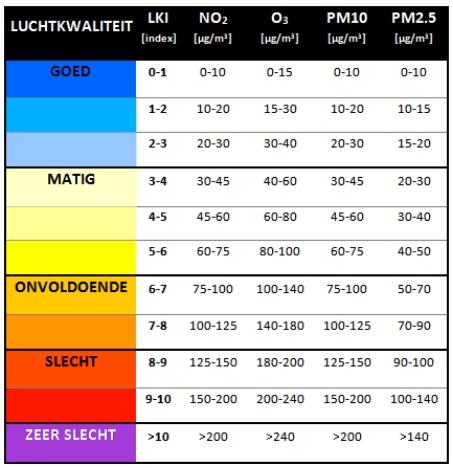

In [663]:
air_quality = pd.read_csv(r'C:\Users\claud\data_final_project\Usefull\amsterdam-air-quality.csv')

In [664]:
air_quality.head()

,date,pm25,pm10,o3,no2,so2,co
0,2021/9/1,44,25,30,22,,3
1,2021/9/2,49,27,32,22,,3
2,2021/9/3,57,23,31,14,,3
3,2021/9/4,46,22,34,15,,3
4,2021/9/5,50,27,37,26,,4


In [665]:
newdate = []

for i in air_quality['date']:
    a = i.split('/')
    year = "{:04d}".format(int(a[0]))
    month = "{:02d}".format(int(a[1]))
    day = "{:02d}".format(int(a[2]))
    b = year + month + day
    newdate.append(b)
    
air_quality['newdate'] = newdate

In [666]:
air_quality.columns

Index(['date', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co', 'newdate'], dtype='object')

In [667]:
air_quality = air_quality.sort_values(by=['newdate'], ascending=True)
air_quality = air_quality[['newdate', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co']]
air_quality.head()

,newdate,pm25,pm10,o3,no2,so2,co
2664,20131231,,,,30,,
2579,20140101,,42,,32,,
2580,20140102,,14,,28,,
2581,20140103,,17,,26,,
2582,20140104,,19,,28,,


## Data Cleaning

- Change headers names.
- Deal with NaN values.
- Categorical Features.
- Numerical Features.

- Standardizing headers by removing spaces and capital letters

In [668]:
def standardheader(df):
    df.columns = [x.strip(' ').lower() for x in df.columns]

In [669]:
standardheader(weather)
standardheader(air_quality)

In [670]:
weather.columns

Index(['yyyymmdd', 'ddvec', 'fhvec', 'fg', 'fhx', 'fhxh', 'fhn', 'fhnh', 'fxx',
       'fxxh', 'tg', 'tn', 'tnh', 'tx', 'txh', 't10n', 't10nh', 'sq', 'sp',
       'q', 'dr', 'rh', 'rhx', 'rhxh', 'pg', 'px', 'pxh', 'pn', 'pnh', 'vvn',
       'vvnh', 'vvx', 'vvxh', 'ng', 'ug', 'ux', 'uxh', 'un', 'unh', 'ev24'],
      dtype='object')

In [671]:
air_quality.columns

Index(['newdate', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co'], dtype='object')

- Checking NaN values

In [672]:
weather.isnull().sum()
#weather.isna().sum() # both give the same result

yyyymmdd    0
ddvec       0
fhvec       0
fg          0
fhx         0
fhxh        0
fhn         0
fhnh        0
fxx         0
fxxh        0
tg          0
tn          0
tnh         0
tx          0
txh         0
t10n        0
t10nh       0
sq          0
sp          0
q           0
dr          0
rh          0
rhx         0
rhxh        0
pg          0
px          0
pxh         0
pn          0
pnh         0
vvn         0
vvnh        0
vvx         0
vvxh        0
ng          0
ug          0
ux          0
uxh         0
un          0
unh         0
ev24        0
dtype: int64

In [673]:
air_quality.isnull().sum()
#air_quality.isna().sum() # both give the same result

newdate    0
pm25       0
pm10       0
o3         0
no2        0
so2        0
co         0
dtype: int64

In [674]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2879 entries, 23010 to 25888
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   yyyymmdd  2879 non-null   int64 
 1   ddvec     2879 non-null   int64 
 2   fhvec     2879 non-null   int64 
 3   fg        2879 non-null   int64 
 4   fhx       2879 non-null   int64 
 5   fhxh      2879 non-null   int64 
 6   fhn       2879 non-null   int64 
 7   fhnh      2879 non-null   int64 
 8   fxx       2879 non-null   object
 9   fxxh      2879 non-null   object
 10  tg        2879 non-null   int64 
 11  tn        2879 non-null   int64 
 12  tnh       2879 non-null   object
 13  tx        2879 non-null   int64 
 14  txh       2879 non-null   object
 15  t10n      2879 non-null   object
 16  t10nh     2879 non-null   object
 17  sq        2879 non-null   object
 18  sp        2879 non-null   object
 19  q         2879 non-null   object
 20  dr        2879 non-null   object
 21  rh       

- Checking how a column type 'object' looks like

In [675]:
weather['fxx'].unique()

array([130, 170, 140, 230, 150, 180, 240, 120, 90, 80, 100, 110, 60, 200,
       160, 220, 210, 70, 50, 250, 190, 270, 40, 320, 280, 260, 30, 340,
       310, 300], dtype=object)

In [676]:
weather['fxx'][:10]

23010    130
23011    170
23012    140
23013    230
23014    150
23015    140
23016    180
23017    180
23018    130
23019    240
Name: fxx, dtype: object

In [677]:
weather['t10n'].unique()

array(['   44', '   34', '   50', '   51', '   48', '    6', '   61',
       '   79', '   55', '   63', '   35', '    8', '  -32', '   25',
       '   19', '   14', '   36', '   39', '    1', '    5', '    2',
       '   20', '   31', '   12', '  -27', '  -30', '  -52', '   33',
       '   15', '   -1', '   18', '   32', '   52', '   29', '   -2',
       '   53', '  -11', '  -15', '   37', '   38', '   16', '   42',
       '   17', '   -7', '  -19', '  -16', '  -34', '    9', '  -10',
       '  -26', '  -25', '   76', '   78', '   64', '   58', '    7',
       '   28', '   82', '   26', '   72', '  103', '   60', '   71',
       '   97', '   45', '   41', '   74', '   30', '   -4', '  -29',
       '   96', '   80', '   47', '   40', '  114', '  108', '  100',
       '   95', '   99', '  107', '   90', '   23', '    3', '   75',
       '  142', '  120', '   94', '   86', '  118', '  145', '   43',
       '   22', '   68', '  123', '  153', '   69', '  116', '  127',
       '   87', '   

In [678]:
weather['t10n'][:10]

23010       44
23011       34
23012       50
23013       51
23014       48
23015        6
23016       61
23017       79
23018       55
23019       63
Name: t10n, dtype: object

- We have a problem with spaces (' ')

In [679]:
for x in weather.columns:
    a = weather[x].dtypes == 'object'
    if a == True:
        weather[x] = [x.strip(' ') for x in weather[x]]
    else:
        pass

AttributeError: 'int' object has no attribute 'strip'

- As the code didn't work, doing it separated

In [680]:
weather['t10n'] = [x.strip(' ') for x in weather['t10n']]

In [681]:
weather['fxx'].unique()

array([130, 170, 140, 230, 150, 180, 240, 120, 90, 80, 100, 110, 60, 200,
       160, 220, 210, 70, 50, 250, 190, 270, 40, 320, 280, 260, 30, 340,
       310, 300], dtype=object)

In [682]:
tostrip = weather.select_dtypes('object').columns
tostrip

Index(['fxx', 'fxxh', 'tnh', 'txh', 't10n', 't10nh', 'sq', 'sp', 'q', 'dr',
       'rh', 'rhx', 'rhxh', 'px', 'pxh', 'pn', 'pnh', 'vvn', 'vvnh', 'vvx',
       'vvxh', 'ng', 'ug', 'ux', 'uxh', 'un', 'unh', 'ev24'],
      dtype='object')

In [683]:
for x in tostrip:
    print(x, weather[x].unique(), '\n')

fxx [130 170 140 230 150 180 240 120 90 80 100 110 60 200 160 220 210 70 50
 250 190 270 40 320 280 260 30 340 310 300] 

fxxh [11 21 1 19 23 20 13 6 12 22 7 8 5 10 18 9 24 3 14 2 15 17 16 4] 

tnh [9 6 23 1 3 8 19 17 2 24 18 4 21 7 20 22 5 15 11 12 16 13 10 14] 

txh [13 22 6 14 18 1 16 15 9 12 24 20 23 11 21 2 10 8 17 7 5 4 19 3] 

t10n ['44' '34' '50' '51' '48' '6' '61' '79' '55' '63' '35' '8' '-32' '25' '19'
 '14' '36' '39' '1' '5' '2' '20' '31' '12' '-27' '-30' '-52' '33' '15'
 '-1' '18' '32' '52' '29' '-2' '53' '-11' '-15' '37' '38' '16' '42' '17'
 '-7' '-19' '-16' '-34' '9' '-10' '-26' '-25' '76' '78' '64' '58' '7' '28'
 '82' '26' '72' '103' '60' '71' '97' '45' '41' '74' '30' '-4' '-29' '96'
 '80' '47' '40' '114' '108' '100' '95' '99' '107' '90' '23' '3' '75' '142'
 '120' '94' '86' '118' '145' '43' '22' '68' '123' '153' '69' '116' '127'
 '87' '83' '117' '59' '62' '73' '56' '91' '128' '147' '131' '146' '130'
 '124' '119' '113' '121' '170' '168' '175' '191' '140' '159' '155' '148'

In [684]:
newtostrip = ['t10nh', 'dr', 'vvn', 'vvnh', 'vvx', 'vvxh', 'ng']

In [685]:
for x in newtostrip:
    weather[x] = [x.strip(' ') for x in weather[x]]

In [686]:
for x in newtostrip:
    print(x, weather[x].unique(), '\n')

t10nh ['12' '6' '24' '18' ''] 

dr ['53' '45' '20' '33' '5' '0' '50' '6' '35' '39' '37' '16' '27' '61' '40'
 '28' '2' '49' '104' '74' '30' '92' '69' '111' '63' '14' '13' '12' '7' '1'
 '42' '25' '26' '15' '22' '48' '100' '17' '9' '4' '3' '36' '24' '10' '51'
 '81' '66' '125' '18' '89' '101' '11' '38' '168' '65' '76' '21' '56' '43'
 '58' '19' '84' '67' '32' '34' '8' '31' '115' '44' '75' '70' '47' '131'
 '64' '146' '23' '139' '109' '118' '211' '29' '77' '46' '99' '90' '52'
 '72' '54' '199' '57' '55' '142' '83' '108' '88' '117' '59' '122' '126'
 '71' '120' '93' '85' '224' '105' '62' '73' '138' '86' '114' '98' '79'
 '95' '96' '41' '60' '159' '161' '106' '82' '113' '124' '134' '87' '119'
 '78' '91' '128' '127' '171' '80' '178' '68' '143' '94' '102' '129' '177'
 '123'] 

vvn ['47' '37' '59' '64' '65' '40' '57' '44' '29' '60' '56' '39' '41' '35'
 '19' '5' '63' '69' '50' '42' '61' '62' '58' '46' '66' '30' '70' '36' '38'
 '28' '0' '34' '21' '3' '1' '48' '23' '24' '20' '45' '22' '8' '67' '26'
 '27

- As now all the information in the data frame looks like numeric let's convert all columns to numeric

In [687]:
for x in weather.columns:
    a = weather[x].dtypes == 'object'
    if a == True:
        weather[x] = pd.to_numeric(weather[x], errors='coerce')
    else:
        pass

In [688]:
weather.dtypes

yyyymmdd      int64
ddvec         int64
fhvec         int64
fg            int64
fhx           int64
fhxh          int64
fhn           int64
fhnh          int64
fxx           int64
fxxh          int64
tg            int64
tn            int64
tnh           int64
tx            int64
txh           int64
t10n        float64
t10nh       float64
sq            int64
sp            int64
q             int64
dr            int64
rh            int64
rhx           int64
rhxh          int64
pg            int64
px            int64
pxh           int64
pn            int64
pnh           int64
vvn         float64
vvnh        float64
vvx         float64
vvxh        float64
ng          float64
ug            int64
ux            int64
uxh           int64
un            int64
unh           int64
ev24          int64
dtype: object

In [715]:
weather.isna().sum()

yyyymmdd    0
ddvec       0
fhvec       0
fg          0
fhx         0
fhxh        0
fhn         0
fhnh        0
fxx         0
fxxh        0
tg          0
tn          0
tnh         0
tx          0
txh         0
t10n        8
t10nh       8
sq          0
sp          0
q           0
dr          0
rh          0
rhx         0
rhxh        0
pg          0
px          0
pxh         0
pn          0
pnh         0
vvn         1
vvnh        1
vvx         1
vvxh        1
ng          5
ug          0
ux          0
uxh         0
un          0
unh         0
ev24        0
rain        0
rainy       0
dtype: int64

- Why is not working?

In [717]:
weather['t10n'] = weather['t10n'].fillna(weather['t10n'].mode())
weather['t10nh'] = weather['t10nh'].fillna(weather['t10nh'].mode())
weather['vvn'] = weather['vvn'].fillna(weather['vvn'].mode())
weather['vvnh'] = weather['vvnh'].fillna(weather['vvnh'].mode())
weather['vvx'] = weather['vvx'].fillna(weather['vvx'].mode())
weather['vvxh'] = weather['vvxh'].fillna(weather['vvxh'].mode())
weather['ng'] = weather['ng'].fillna(weather['ng'].mode())

In [720]:
weather['t10n'][weather['t10n'].isna()==True]

25605   NaN
25606   NaN
25607   NaN
25608   NaN
25610   NaN
25611   NaN
25612   NaN
25613   NaN
Name: t10n, dtype: float64

In [718]:
weather.isna().sum()

yyyymmdd    0
ddvec       0
fhvec       0
fg          0
fhx         0
fhxh        0
fhn         0
fhnh        0
fxx         0
fxxh        0
tg          0
tn          0
tnh         0
tx          0
txh         0
t10n        8
t10nh       8
sq          0
sp          0
q           0
dr          0
rh          0
rhx         0
rhxh        0
pg          0
px          0
pxh         0
pn          0
pnh         0
vvn         1
vvnh        1
vvx         1
vvxh        1
ng          5
ug          0
ux          0
uxh         0
un          0
unh         0
ev24        0
rain        0
rainy       0
dtype: int64

- Creating a column that tells if rained or not and another one to give this info for the previous day

In [689]:
rain = []
r = 0

for i in weather['rh']:
    if i != 0:
        r = 1
    else:
        r = 0
    rain.append(r)
    
weather['rain'] = rain # column that tells if rained on that day
weather['rainy'] = weather['rain'].shift(1) # column that tells if rained on the day before
weather['rainy'] = weather['rainy'].fillna(mode(weather['rain'])) # the 1st row is going to be NaN, this line replaces for the mode
weather['rainy'] = weather['rainy'].astype('int') # convert from float to int

In [690]:
weather['rainy'].isna().sum()

0

In [691]:
weather.describe()

,yyyymmdd,ddvec,fhvec,fg,fhx,fhxh,fhn,fhnh,fxx,fxxh,...,vvxh,ng,ug,ux,uxh,un,unh,ev24,rain,rainy
count,2.879000e+03,2879.000000,2879.000000,2879.000000,2879.000000,2879.000000,2879.000000,2879.000000,2879.000000,2879.000000,...,2878.000000,2874.000000,2879.00000,2879.000000,2879.000000,2879.000000,2879.000000,2879.000000,2879.000000,2879.000000
mean,2.017511e+07,193.744356,42.832581,48.746440,73.678361,11.701285,24.029177,9.033692,117.888156,12.326850,...,12.501390,5.799235,79.71761,93.334491,9.379646,64.037166,13.283084,17.576936,0.623480,0.623480
std,2.267517e+04,91.040094,22.896444,21.806169,28.039646,5.787561,17.903121,8.690768,42.727379,5.710147,...,5.482855,2.211192,9.68287,5.819287,8.773738,14.213587,4.121516,14.397450,0.484597,0.484597
min,2.013123e+07,1.000000,2.000000,10.000000,20.000000,1.000000,0.000000,1.000000,30.000000,1.000000,...,1.000000,0.000000,36.00000,46.000000,1.000000,20.000000,1.000000,0.000000,0.000000,0.000000
25%,2.015122e+07,127.000000,26.000000,33.000000,50.000000,9.000000,10.000000,1.000000,90.000000,10.000000,...,10.000000,5.000000,74.00000,91.000000,2.000000,54.000000,12.000000,5.000000,0.000000,0.000000
50%,2.017121e+07,211.000000,39.000000,45.000000,70.000000,12.000000,20.000000,4.000000,110.000000,13.000000,...,13.000000,6.000000,81.00000,95.000000,5.000000,64.000000,13.000000,14.000000,1.000000,1.000000
75%,2.019113e+07,258.000000,56.000000,61.000000,90.000000,15.000000,30.000000,19.000000,140.000000,16.000000,...,16.000000,8.000000,87.00000,97.000000,20.000000,74.000000,15.000000,27.000000,1.000000,1.000000
max,2.021112e+07,360.000000,142.000000,146.000000,230.000000,24.000000,130.000000,24.000000,340.000000,24.000000,...,24.000000,8.000000,99.00000,100.000000,24.000000,98.000000,24.000000,58.000000,1.000000,1.000000


In [695]:
ddvec = len(weather[weather['ddvec']==0]) # 'ddvec' - vector mean wind direction
fhvec = len(weather[weather['fhvec']==0]) # 'fhvec' - vector mean wind speed
fg = len(weather[weather['fg']==0]) # fg - 24-h mean wind speed
tg = len(weather[weather['tg']==0]) # tg - medium temperature
rh = len(weather[weather['rh']==0]) # rh - daily precipitation amount
print(ddvec, fhvec, fg, tg, rh)

0 0 0 3 1084


In [692]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2666 entries, 2664 to 2280
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   newdate  2666 non-null   object
 1   pm25     2666 non-null   object
 2   pm10     2666 non-null   object
 3   o3       2666 non-null   object
 4   no2      2666 non-null   object
 5   so2      2666 non-null   object
 6   co       2666 non-null   object
dtypes: object(7)
memory usage: 166.6+ KB


In [696]:
pm25 = len(air_quality[air_quality['pm25']==' '])
pm10 = len(air_quality[air_quality['pm10']==' '])
o3 = len(air_quality[air_quality['o3']==' '])
no2 = len(air_quality[air_quality['no2']==' '])
print(pm25, pm10, o3, no2)

401 9 46 12


In [697]:
pm25 = len(air_quality[air_quality['pm25']==0])
pm10 = len(air_quality[air_quality['pm10']==0])
o3 = len(air_quality[air_quality['o3']==0])
no2 = len(air_quality[air_quality['no2']==0])
print(pm25, pm10, o3, no2)

0 0 0 0


- Replacing spaces (' ') for empty ('')

In [698]:
air_quality[air_quality['pm25']==' ']

,newdate,pm25,pm10,o3,no2,so2,co
2664,20131231,,,,30,,
2579,20140101,,42,,32,,
2580,20140102,,14,,28,,
2581,20140103,,17,,26,,
2582,20140104,,19,,28,,
...,...,...,...,...,...,...,...
2276,20211112,,40,15,20,,3
2277,20211113,,22,9,12,,3
2278,20211114,,22,15,13,,3
2279,20211115,,25,13,16,,3


In [699]:
for row in air_quality['pm25']:
    if (row == ' ') == True:
        row.replace(' ', 'NaN')
        #row = ''
    else:
        pass

In [700]:
pm25 = len(air_quality[air_quality['pm25']==' '])
pm25

401

- Didn't work, moving on trying to convert into numeric

In [701]:
for x in air_quality.columns:
    air_quality[x] =  pd.to_numeric(air_quality[x], errors='coerce')

In [702]:
air_quality.dtypes

newdate      int64
pm25       float64
pm10       float64
o3         float64
no2        float64
so2        float64
co         float64
dtype: object

In [703]:
gas = air_quality.columns.tolist()
NaN = air_quality.isna().sum()
NaNperc = air_quality.isna().sum()/air_quality.shape[0]
aqNaN = pd.DataFrame(list(zip(gas, NaN, NaNperc)),
               columns =['gas', 'NaN', 'NaN%'])
aqNaN['NaN%'] = aqNaN['NaN%'].map('{:.2%}'.format)
aqNaN

,gas,NaN,NaN%
0,newdate,0,0.00%
1,pm25,401,15.04%
2,pm10,9,0.34%
3,o3,46,1.73%
4,no2,12,0.45%
5,so2,1979,74.23%
6,co,465,17.44%


- Still not working, moving on to the info about the quality of the air based on the gas level

In [630]:
no2lki = []
LKI = 0

for no2 in air_quality['no2']:
    
    if no2 == ' ':
        LKI = 0
    elif int(no2) < 10:
        LKI = 1
    elif int(no2) >= 10 & int(no2) < 20:
        LKI = 2
    elif int(no2) >= 20 & int(no2) < 30:
        LKI = 3        
    elif int(no2) >= 30 & int(no2) < 45:
        LKI = 4
    elif int(no2) >= 45 & int(no2) < 60:
        LKI = 5
    elif int(no2) >= 60 & int(no2) < 75:
        LKI = 6
    elif int(no2) >= 75 & int(no2) < 100:
        LKI = 7
    elif int(no2) >= 100 & int(no2) < 125:
        LKI = 8
    elif int(no2) >= 125 & int(no2) < 150:
        LKI = 9
    elif int(no2) >= 150 & int(no2) < 200:
        LKI = 10
    else: #elif int(no2) >= 200:
        LKI = 11
    
    no2lki.append(LKI)
    
air_quality['no2lki'] = no2lki

In [631]:
air_quality['no2lki'].value_counts()

2    2569
1      85
0      12
Name: no2lki, dtype: int64

In [632]:
o3lki = []
LKI = 0

for o3 in air_quality['o3']:
    
    if o3 == ' ':
        LKI = 0
    elif int(o3) < 15:
        LKI = 1
    elif int(o3) >= 15 & int(o3) < 30:
        LKI = 2
    elif int(o3) >= 30 & int(o3) < 40:
        LKI = 3        
    elif int(o3) >= 40 & int(o3) < 60:
        LKI = 4
    elif int(o3) >= 60 & int(o3) < 80:
        LKI = 5
    elif int(o3) >= 80 & int(o3) < 100:
        LKI = 6
    elif int(o3) >= 100 & int(o3) < 140:
        LKI = 7
    elif int(o3) >= 140 & int(o3) < 180:
        LKI = 8
    elif int(o3) >= 180 & int(o3) < 200:
        LKI = 9
    elif int(o3) >= 200 & int(o3) < 240:
        LKI = 10
    else: #elif int(o3) >= 240:
        LKI = 11
        
    o3lki.append(LKI)
    
air_quality['o3lki'] = o3lki

In [633]:
air_quality['o3lki'].value_counts()

2    2271
1     349
0      46
Name: o3lki, dtype: int64

In [634]:
pm10lki = []
LKI = 0

for pm10 in air_quality['pm10']:
    
    if pm10 == ' ':
        LKI = 0
    elif int(pm10) < 10:
        LKI = 1
    elif int(pm10) >= 10 & int(pm10) < 20:
        LKI = 2
    elif int(pm10) >= 20 & int(pm10) < 30:
        LKI = 3        
    elif int(pm10) >= 30 & int(pm10) < 45:
        LKI = 4
    elif int(pm10) >= 45 & int(pm10) < 60:
        LKI = 5
    elif int(pm10) >= 60 & int(pm10) < 75:
        LKI = 6
    elif int(pm10) >= 75 & int(pm10) < 100:
        LKI = 7
    elif int(pm10) >= 100 & int(pm10) < 125:
        LKI = 8
    elif int(pm10) >= 125 & int(pm10) < 150:
        LKI = 9
    elif int(pm10) >= 150 & int(pm10) < 200:
        LKI = 10
    else: #elif int(pm10) >= 200:
        LKI = 11
        
    pm10lki.append(LKI)
    
air_quality['pm10lki'] = pm10lki

In [635]:
air_quality['pm10lki'].value_counts()

2    2649
0       9
1       8
Name: pm10lki, dtype: int64

In [230]:
pm25lki = []
LKI = 0

for pm25 in air_quality['pm25']:
    print(pm25)
    
    if pm25 == ' ':
        LKI = 0
    elif int(pm25) < 10:
        LKI = 1
    elif int(pm25) >= 10 & int(pm25) < 15:
        LKI = 2
    elif int(pm25) >= 15 & int(pm25) < 20:
        LKI = 3        
    elif int(pm25) >= 20 & int(pm25) < 30:
        LKI = 4
    elif int(pm25) >= 30 & int(pm25) < 40:
        LKI = 5
    elif int(pm25) >= 40 & int(pm25) < 50:
        LKI = 6
    elif int(pm25) >= 50 & int(pm25) < 70:
        LKI = 7
    elif int(pm25) >= 70 & int(pm25) < 90:
        LKI = 8
    elif int(pm25) >= 90 & int(pm25) < 100:
        LKI = 9
    elif int(pm25) >= 100 & int(pm25) < 140:
        LKI = 10
    else: #elif int(pm25) >= 140:
        LKI = 11
        
        pm25lki.append(LKI)
    
air_quality['pm25lki'] = pm25lki

 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 54
 56
 46
 48
 70
 85
 69
 92
 82
 62
 32
 40
 75
 102
 80
 43
 41
 56
 61
 61
 65
 70
 71
 70
 61
 62
 83
 77
 85
 73
 78
 53
 54
 70
 77
 85
 97
 119
 94
 111
 107
 113
 125
 77
 54
 44
 46
 49
 28
 21
 35
 56
 64
 51
 49
 33
 28
 32
 38
 38
 47
 25
 28
 36
 56
 43
 
 156
 78
 37
 38
 66
 80
 62
 54
 41
 53
 50
 47
 39
 20
 21
 30
 44
 58
 66
 71
 99
 101
 101
 117
 54
 53
 45
 53
 41
 29
 37
 44
 30
 31
 4

 89
 75
 42
 57
 54
 40
 36
 40
 51
 37
 40
 50
 37
 40
 70
 69
 51
 62
 90
 80
 119
 35
 56
 54
 28
 48
 78
 62
 87
 84
 70
 62
 70
 58
 38
 58
 61
 49
 47
 46
 50
 40
 35
 50
 31
 36
 41
 39
 54
 53
 32
 71
 172
 58
 71
 38
 32
 41
 31
 37
 51
 53
 55
 30
 35
 40
 60
 66
 60
 39
 41
 42
 32
 32
 49
 37
 72
 42
 53
 37
 45
 42
 64
 81
 72
 38
 57
 77
 76
 52
 45
 38
 44
 61
 65
 60
 54
 57
 62
 46
 39
 45
 56
 60
 58
 71
 54
 69
 55
 69
 62
 63
 94
 126
 69
 56
 47
 65
 72
 57
 78
 60
 37
 35
 35
 41
 38
 31
 47
 38
 46
 43
 41
 77
 96
 89
 55
 40
 46
 49
 71
 109
 85
 48
 58
 42
 48
 35
 41
 37
 48
 34
 27
 32
 38
 45
 49
 58
 67
 59
 84
 84
 84
 51
 49
 41
 41
 46
 45
 58
 64
 61
 49
 34
 60
 37
 40
 42
 39
 58
 52
 42
 58
 55
 46
 49
 51
 42
 39
 45
 44
 50
 39
 30
 38
 28
 35
 34
 41
 45
 47
 56
 57
 49
 60
 73
 73
 82
 42
 45
 50
 48
 52
 60
 43
 50
 62
 42
 50
 73
 73
 56
 35
 29
 44
 33
 44
 69
 66
 74
 62
 49
 38
 56
 47
 66
 53
 47
 34
 43
 44
 56
 75
 66
 69
 77
 59
 59
 55


ValueError: Length of values (0) does not match length of index (2666)

In [636]:
air_quality['pm25'].unique()

array([' ', ' 54', ' 56', ' 46', ' 48', ' 70', ' 85', ' 69', ' 92', ' 82',
       ' 62', ' 32', ' 40', ' 75', ' 102', ' 80', ' 43', ' 41', ' 61',
       ' 65', ' 71', ' 83', ' 77', ' 73', ' 78', ' 53', ' 97', ' 119',
       ' 94', ' 111', ' 107', ' 113', ' 125', ' 44', ' 49', ' 28', ' 21',
       ' 35', ' 64', ' 51', ' 33', ' 38', ' 47', ' 25', ' 36', ' 156',
       ' 37', ' 66', ' 50', ' 39', ' 20', ' 30', ' 58', ' 99', ' 101',
       ' 117', ' 45', ' 29', ' 31', ' 81', ' 59', ' 67', ' 114', ' 136',
       ' 100', ' 96', ' 158', ' 149', ' 91', ' 90', ' 68', ' 55', ' 42',
       ' 26', ' 57', ' 76', ' 138', ' 153', ' 150', ' 123', ' 60', ' 23',
       ' 27', ' 106', ' 63', ' 79', ' 72', ' 34', ' 52', ' 87', ' 121',
       ' 145', ' 98', ' 74', ' 105', ' 89', ' 84', ' 116', ' 131', ' 124',
       ' 88', ' 120', ' 161', ' 86', ' 115', ' 137', ' 103', ' 104',
       ' 93', ' 110', ' 160', ' 141', ' 126', ' 155', ' 95', ' 151',
       ' 129', ' 128', ' 152', ' 164', ' 154', ' 143', ' 118',

In [637]:
air_quality['pm25'].value_counts()

        401
 50      67
 48      57
 45      57
 44      56
       ... 
 164      1
 128      1
 165      1
 139      1
 107      1
Name: pm25, Length: 137, dtype: int64

In [638]:
for no2, o3, pm10 in zip(air_quality['no2lki'], air_quality['o3lki'], air_quality['pm10lki']):
    
    print(no2, o3, pm10)

2 0 0
2 0 2
2 0 2
2 0 2
2 0 2
2 0 2
2 0 2
2 0 2
2 0 2
2 0 2
2 0 2
0 0 2
2 0 0
2 0 2
2 0 2
2 0 2
2 0 2
2 0 2
2 0 2
2 0 2
2 0 2
2 0 2
2 0 2
2 0 2
0 0 2
0 1 0
2 1 2
2 2 2
2 2 2
2 1 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 1 2
2 1 2
2 1 2
2 1 2
2 2 2
2 2 2
2 1 2
2 1 2
2 2 2
2 2 2
2 1 2
2 1 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 1 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 1 2
2 1 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 1 2
2 1 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 1 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 1 2
2 1 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
0 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 

2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 1 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 1 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 1
2 2 2
2 2 2
2 1 2
2 1 2
2 2 2
2 1 2
2 1 2
2 1 2
2 1 2
2 2 2
2 2 2
2 1 2
2 2 2
2 2 2
2 1 2
2 2 2
2 1 2
2 1 2
2 1 2
2 1 2
2 2 2
2 2 2
2 2 2
2 1 2
2 1 2
2 0 2
2 1 2
2 1 2
2 1 2
2 1 2
2 1 2
2 1 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 1 2
2 2 2
2 2 2
1 2 2
1 2 2
2 2 2
2 2 2
2 1 2
2 1 2
2 1 2
2 1 2
2 1 2
2 1 2
2 1 2
2 1 

In [639]:
totallki = []
LKI = 0

for no2, o3, pm10 in zip(air_quality['no2lki'], air_quality['o3lki'], air_quality['pm10lki']):
    
    m = max(int(no2), int(o3), int(pm10))
    
    if m < 4:
        LKI = 'good'
    elif m >= 4 & m < 7:
        LKI = 'mediocre'
    elif m >= 7 & m < 9:
        LKI = 'inadequate'      
    elif m >= 9 & m < 11:
        LKI = 'bad'
    else: #elif m >= 11:
        LKI = 'very bad'
        
        totallki.append(LKI)
    
air_quality['totallki'] = totallki

TypeError: 'int' object is not callable

In [640]:
air_quality.head()

,newdate,pm25,pm10,o3,no2,so2,co,no2lki,o3lki,pm10lki
2664,20131231,,,,30,,,2,0,0
2579,20140101,,42,,32,,,2,0,2
2580,20140102,,14,,28,,,2,0,2
2581,20140103,,17,,26,,,2,0,2
2582,20140104,,19,,28,,,2,0,2


- Exporting this processed data to a csv

In [641]:
weather.to_csv('cleanweather.csv')
air_quality.to_csv('cleanairquality.csv')

- Merging the tables

In [643]:
weather = weather.set_index('yyyymmdd')
air_quality = air_quality.set_index('newdate')

## EDA

In [249]:
corr_weather = weather.select_dtypes([np.number])
correlations_matrix = corr_weather.corr()
correlations_matrix

,yyyymmdd,ddvec,fhvec,fg,fhx,fhxh,fhn,fhnh,tg,tn,tx,rh,pg
yyyymmdd,1.000000,0.002475,-0.010293,-0.018317,-0.020898,0.001572,-0.025832,-0.011733,0.014103,0.000565,0.021398,-0.005018,0.009701
ddvec,0.002475,1.000000,0.107347,0.154639,0.236396,-0.007863,0.033076,0.089154,0.034090,0.080032,-0.000052,0.108147,-0.063849
fhvec,-0.010293,0.107347,1.000000,0.966034,0.868352,-0.036929,0.847025,0.130587,-0.151493,-0.031101,-0.237782,0.189099,-0.313703
fg,-0.018317,0.154639,0.966034,1.000000,0.926965,-0.031885,0.854503,0.153511,-0.129420,-0.005929,-0.214185,0.271145,-0.395916
fhx,-0.020898,0.236396,0.868352,0.926965,1.000000,0.070043,0.688792,0.138385,-0.094655,0.004658,-0.161827,0.315891,-0.420082
fhxh,0.001572,-0.007863,-0.036929,-0.031885,0.070043,1.000000,-0.052162,-0.386133,0.106027,0.053811,0.134040,-0.020780,0.046849
fhn,-0.025832,0.033076,0.847025,0.854503,0.688792,-0.052162,1.000000,0.017082,-0.160124,-0.023231,-0.244434,0.169178,-0.320704
fhnh,-0.011733,0.089154,0.130587,0.153511,0.138385,-0.386133,0.017082,1.000000,-0.046493,0.002433,-0.071188,0.079072,-0.094515
tg,0.014103,0.034090,-0.151493,-0.129420,-0.094655,0.106027,-0.160124,-0.046493,1.000000,0.952017,0.976920,0.022297,0.001009
tn,0.000565,0.080032,-0.031101,-0.005929,0.004658,0.053811,-0.023231,0.002433,0.952017,1.000000,0.881920,0.100483,-0.088832


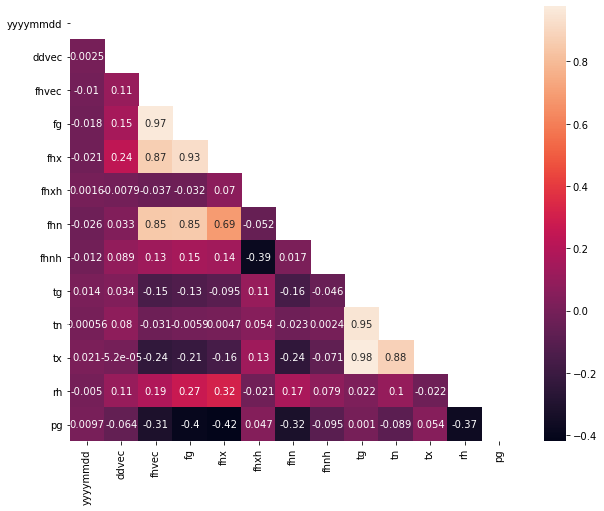

In [250]:
mask = np.zeros_like(correlations_matrix)

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [ ]:
data_corr[(data_corr['IC1'] > 0.8) | (data_corr['IC1'] < -0.8)][['IC1', 'TARGET_D']] # filtering for some analysis

The chi-square independence test is a procedure for testing if two categorical variables are related in some population. (unit 1 3-EDA)